### In this analysis we're going to figure out the best streaming artists on Spotify in year 2021, what trends were artists hopping on, and how did global pandemic have effect on up and coming, and already established artists.

##### Niko Grgurev, Trokut NEET Academy

# 0. Imports and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 200)

# Visualisation libraries matplotlib and seaborn are going to help us visualise and make exploratory plots with our data.

# We're also going to use style sheet for matplotlib and seaborn style plots, and we're going to expand the number of columns shown in our data by default.

In [2]:
# Importing our data which is already loaded in Kaggle by pasting the copied directory path of the .csv file 

df = pd.read_csv('/kaggle/input/test-data-set/spotify_tracks_metadata.csv')

# 1. Understanding Data

##### First we're gonna check the shape of the data frame that we've just loaded.


In [3]:
df.shape

(439893, 26)

##### Now we're going to check head and a tail of our dataset


In [4]:
df.head()

,Unnamed: 0,spotify_id,song_name,artist_name,song_popularity,album_release_date,album_release_year,album_release_month,analysis_url,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,song_explicit,speechiness,tempo,time_signature,total_available_markets,track_href,uri,valence
0,0,7lPN2DXiMsVn7XUKtOW1CS,drivers license,Olivia Rodrigo,100,2021-01-08,2021.0,1.0,https://api.spotify.com/v1/audio-analysis/7lPN...,0.72100,0.585,242014.0,0.436,0.000013,10.0,0.1050,-8.761,1.0,True,0.0601,143.874,4.0,170,https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,0.132
1,1,5QO79kh1waicV47BqGRL3g,Save Your Tears,The Weeknd,96,2020-03-20,2020.0,3.0,https://api.spotify.com/v1/audio-analysis/5QO7...,0.02120,0.680,215627.0,0.826,0.000012,0.0,0.5430,-5.487,1.0,True,0.0309,118.051,4.0,170,https://api.spotify.com/v1/tracks/5QO79kh1waic...,spotify:track:5QO79kh1waicV47BqGRL3g,0.644
2,2,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,96,2020-03-20,2020.0,3.0,https://api.spotify.com/v1/audio-analysis/0VjI...,0.00146,0.514,200040.0,0.730,0.000095,1.0,0.0897,-5.934,1.0,False,0.0598,171.005,4.0,170,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,0.334
3,3,3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior),24kGoldn,95,2020-07-24,2020.0,7.0,https://api.spotify.com/v1/audio-analysis/3tjF...,0.22100,0.700,140526.0,0.722,0.000000,7.0,0.2720,-3.558,0.0,True,0.0369,90.989,4.0,170,https://api.spotify.com/v1/tracks/3tjFYV6RSFtu...,spotify:track:3tjFYV6RSFtuktYl3ZtYcq,0.756
4,4,27OeeYzk6klgBh83TSvGMA,WITHOUT YOU,The Kid LAROI,94,2020-11-06,2020.0,11.0,https://api.spotify.com/v1/audio-analysis/27Oe...,0.21300,0.662,161385.0,0.413,0.000000,0.0,0.1340,-7.357,1.0,True,0.0299,93.005,4.0,170,https://api.spotify.com/v1/tracks/27OeeYzk6klg...,spotify:track:27OeeYzk6klgBh83TSvGMA,0.467


In [5]:
df.tail()

,Unnamed: 0,spotify_id,song_name,artist_name,song_popularity,album_release_date,album_release_year,album_release_month,analysis_url,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,song_explicit,speechiness,tempo,time_signature,total_available_markets,track_href,uri,valence
439888,439888,4JC8B6ysYqjYHYgWS2LXD1,Aarti Durga Maa Ki,Anuradha Paudwal,0,2021-03-01,2021.0,3.0,https://api.spotify.com/v1/audio-analysis/4JC8...,0.4150,0.587,317759.0,0.587,0.000000,11.0,0.6000,-8.828,1.0,False,0.0325,89.976,4.0,169,https://api.spotify.com/v1/tracks/4JC8B6ysYqjY...,spotify:track:4JC8B6ysYqjYHYgWS2LXD1,0.564
439889,439889,4MXJGhB29ow0ioRyVtdAO4,Aaramangal,K. S. Chithra,0,2021-02-25,2021.0,2.0,https://api.spotify.com/v1/audio-analysis/4MXJ...,0.5210,0.748,312375.0,0.482,0.000006,9.0,0.2380,-8.669,0.0,False,0.0303,113.019,4.0,169,https://api.spotify.com/v1/tracks/4MXJGhB29ow0...,spotify:track:4MXJGhB29ow0ioRyVtdAO4,0.910
439890,439890,58Su3ZNDTIzK2whzWK9wla,"Aarti (Lovthavti Vikrala) [From ""Shankara Karu...",Anuradha Paudwal,0,2021-03-09,2021.0,3.0,https://api.spotify.com/v1/audio-analysis/58Su...,0.6080,0.672,126457.0,0.380,0.000000,5.0,0.0799,-10.281,0.0,False,0.0349,100.613,3.0,170,https://api.spotify.com/v1/tracks/58Su3ZNDTIzK...,spotify:track:58Su3ZNDTIzK2whzWK9wla,0.908
439891,439891,28QFQkEDBCLczY6CXoxmXb,Aa Bhi Jao Ki,Kavita Krishnamurthy,0,2021-03-04,2021.0,3.0,https://api.spotify.com/v1/audio-analysis/28QF...,0.0891,0.777,337536.0,0.556,0.000891,4.0,0.0896,-10.777,1.0,False,0.0263,106.999,4.0,170,https://api.spotify.com/v1/tracks/28QFQkEDBCLc...,spotify:track:28QFQkEDBCLczY6CXoxmXb,0.784
439892,439892,3lGPQlCipYRcjImggeRRjE,Hablando Pxvadas,D-Optus,0,2020-09-07,2020.0,9.0,https://api.spotify.com/v1/audio-analysis/3lGP...,0.0610,0.812,152560.0,0.465,0.029100,0.0,0.4260,-14.349,0.0,False,0.2150,143.011,4.0,170,https://api.spotify.com/v1/tracks/3lGPQlCipYRc...,spotify:track:3lGPQlCipYRcjImggeRRjE,0.791


##### Now we're going to list out all the columns for better understanding of the dataset, and to specify which one are going to remove/rename


In [6]:

df.columns

Index(['Unnamed: 0', 'spotify_id', 'song_name', 'artist_name',
       'song_popularity', 'album_release_date', 'album_release_year',
       'album_release_month', 'analysis_url', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'song_explicit', 'speechiness', 'tempo',
       'time_signature', 'total_available_markets', 'track_href', 'uri',
       'valence'],
      dtype='object')

##### We've ran the dtypes to figure out the types of data that is stored in our dataset. From our results, we can see that most of the columns are numbers 


In [7]:

df.dtypes

Unnamed: 0                   int64
spotify_id                  object
song_name                   object
artist_name                 object
song_popularity              int64
album_release_date          object
album_release_year         float64
album_release_month        float64
analysis_url                object
acousticness               float64
danceability               float64
duration_ms                float64
energy                     float64
instrumentalness           float64
key                        float64
liveness                   float64
loudness                   float64
mode                       float64
song_explicit                 bool
speechiness                float64
tempo                      float64
time_signature             float64
total_available_markets      int64
track_href                  object
uri                         object
valence                    float64
dtype: object

##### We're going to look up information and statistics about our numeric data in dataset


In [8]:

df.describe()

,Unnamed: 0,song_popularity,album_release_year,album_release_month,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,total_available_markets,valence
count,439893.00000,439893.000000,439690.000000,420559.000000,439893.000000,439893.000000,4.398930e+05,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000
mean,219946.00000,22.809390,2014.952946,6.155396,0.332647,0.616870,2.133885e+05,0.584848,0.188697,5.288957,0.209445,-9.960702,0.574342,0.191600,119.238750,3.878545,160.520076,0.475361
std,126986.31532,18.518437,17.427527,3.711844,0.320389,0.178007,1.239932e+05,0.249089,0.338787,3.606797,0.179297,5.897513,0.494443,0.252524,30.200554,0.546340,33.688941,0.253360
min,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.864000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,109973.00000,7.000000,2014.000000,3.000000,0.039700,0.515000,1.540000e+05,0.412000,0.000000,2.000000,0.098900,-12.383000,0.000000,0.042000,95.146000,4.000000,169.000000,0.275000
50%,219946.00000,20.000000,2018.000000,6.000000,0.224000,0.647000,1.993850e+05,0.610000,0.000021,5.000000,0.131000,-8.409000,1.000000,0.071600,120.006000,4.000000,170.000000,0.472000
75%,329919.00000,36.000000,2020.000000,10.000000,0.587000,0.743000,2.473200e+05,0.786000,0.148000,8.000000,0.272000,-5.949000,1.000000,0.232000,139.009000,4.000000,170.000000,0.673000
max,439892.00000,100.000000,2021.000000,12.000000,0.996000,0.994000,6.024647e+06,1.000000,1.000000,11.000000,1.000000,5.285000,1.000000,0.972000,249.810000,5.000000,170.000000,1.000000


### Now that we have all the information we need in order to understand this dataset, we can proceed with data preparation. 

# 2. Data Preparation

### In this part, we're going to focus on dropping irrelevant columns and rows from our data, identifying duplicated data, and editing column names for better understanding of the data.

In [9]:
# We're going to pull our columns once again just so we can have a clearer vision of what we're going to drop here

df.columns

Index(['Unnamed: 0', 'spotify_id', 'song_name', 'artist_name',
       'song_popularity', 'album_release_date', 'album_release_year',
       'album_release_month', 'analysis_url', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'song_explicit', 'speechiness', 'tempo',
       'time_signature', 'total_available_markets', 'track_href', 'uri',
       'valence'],
      dtype='object')

##### Now that we can see our columns clearly, we're going to drop a couple of them which don't make sense and can not be used in our analysis here.


In [10]:
df[['Unnamed: 0', 
    'spotify_id', 
    # 'song_name', 'artist_name',
   # 'song_popularity', 
   # 'album_release_date', 
   # 'album_release_year',
   # 'album_release_month', 
    'analysis_url', 
   # 'acousticness', 
    'danceability',
    'duration_ms', 
    'energy', 
    'instrumentalness', 
   # 'key', 
    'liveness',
   # 'loudness', 
    #'mode',
    'song_explicit', 
    'speechiness', 
   # 'tempo',
    'time_signature', 
   # 'total_available_markets', 
    'track_href', 
    'uri',
    'valence']]

# I've commented out every column that we're going to keep, and others are getting dropped.

,Unnamed: 0,spotify_id,analysis_url,danceability,duration_ms,energy,instrumentalness,liveness,song_explicit,speechiness,time_signature,track_href,uri,valence
0,0,7lPN2DXiMsVn7XUKtOW1CS,https://api.spotify.com/v1/audio-analysis/7lPN...,0.585,242014.0,0.436,0.000013,0.1050,True,0.0601,4.0,https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,0.132
1,1,5QO79kh1waicV47BqGRL3g,https://api.spotify.com/v1/audio-analysis/5QO7...,0.680,215627.0,0.826,0.000012,0.5430,True,0.0309,4.0,https://api.spotify.com/v1/tracks/5QO79kh1waic...,spotify:track:5QO79kh1waicV47BqGRL3g,0.644
2,2,0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/audio-analysis/0VjI...,0.514,200040.0,0.730,0.000095,0.0897,False,0.0598,4.0,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,0.334
3,3,3tjFYV6RSFtuktYl3ZtYcq,https://api.spotify.com/v1/audio-analysis/3tjF...,0.700,140526.0,0.722,0.000000,0.2720,True,0.0369,4.0,https://api.spotify.com/v1/tracks/3tjFYV6RSFtu...,spotify:track:3tjFYV6RSFtuktYl3ZtYcq,0.756
4,4,27OeeYzk6klgBh83TSvGMA,https://api.spotify.com/v1/audio-analysis/27Oe...,0.662,161385.0,0.413,0.000000,0.1340,True,0.0299,4.0,https://api.spotify.com/v1/tracks/27OeeYzk6klg...,spotify:track:27OeeYzk6klgBh83TSvGMA,0.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439888,439888,4JC8B6ysYqjYHYgWS2LXD1,https://api.spotify.com/v1/audio-analysis/4JC8...,0.587,317759.0,0.587,0.000000,0.6000,False,0.0325,4.0,https://api.spotify.com/v1/tracks/4JC8B6ysYqjY...,spotify:track:4JC8B6ysYqjYHYgWS2LXD1,0.564
439889,439889,4MXJGhB29ow0ioRyVtdAO4,https://api.spotify.com/v1/audio-analysis/4MXJ...,0.748,312375.0,0.482,0.000006,0.2380,False,0.0303,4.0,https://api.spotify.com/v1/tracks/4MXJGhB29ow0...,spotify:track:4MXJGhB29ow0ioRyVtdAO4,0.910
439890,439890,58Su3ZNDTIzK2whzWK9wla,https://api.spotify.com/v1/audio-analysis/58Su...,0.672,126457.0,0.380,0.000000,0.0799,False,0.0349,3.0,https://api.spotify.com/v1/tracks/58Su3ZNDTIzK...,spotify:track:58Su3ZNDTIzK2whzWK9wla,0.908
439891,439891,28QFQkEDBCLczY6CXoxmXb,https://api.spotify.com/v1/audio-analysis/28QF...,0.777,337536.0,0.556,0.000891,0.0896,False,0.0263,4.0,https://api.spotify.com/v1/tracks/28QFQkEDBCLc...,spotify:track:28QFQkEDBCLczY6CXoxmXb,0.784


In [11]:
df = df.drop([ 'Unnamed: 0', 'spotify_id', 'analysis_url', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'song_explicit', 'speechiness', 'time_signature', 'track_href', 'uri', 'valence' ], axis=1).copy()


Now we have the dataset with only 12 columns that are relevant to work on today.

### Renaming Columns in our Dataset

In [12]:
df.dtypes

song_name                   object
artist_name                 object
song_popularity              int64
album_release_date          object
album_release_year         float64
album_release_month        float64
acousticness               float64
key                        float64
loudness                   float64
mode                       float64
tempo                      float64
total_available_markets      int64
dtype: object

In [13]:
df = df.rename(columns={'song_name':'Track',
                   'artist_name':'Artist',
                   'album_release_date':'Release',
                   'album_release_year':'Year',
                   'album_release_month':'Month',
                   'song_popularity':'Rating',
                   'total_available_markets':'MarketShare'})

### Identifying missing values

In [14]:
df.isna().sum()

Track               2
Artist              9
Rating              0
Release             0
Year              203
Month           19334
acousticness        0
key                 0
loudness            0
mode                0
tempo               0
MarketShare         0
dtype: int64

### Identifying duplicates

In [15]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
439888    False
439889    False
439890    False
439891    False
439892    False
Length: 439893, dtype: bool

In [16]:
df.loc[df.duplicated()]

,Track,Artist,Rating,Release,Year,Month,acousticness,key,loudness,mode,tempo,MarketShare


#### From the first look, we seem to be fine here, but I want to check if there's any duplicates in a specific column. I'll run it on "Track", because I want to see if there's any tracks that are inputed twice, and if there's a reason for it. 

In [17]:
df.loc[df.duplicated(subset=['Track'])]

,Track,Artist,Rating,Release,Year,Month,acousticness,key,loudness,mode,tempo,MarketShare
188,Falling,Trevor Daniel,84,2018-10-05,2018.0,10.0,0.123000,10.0,-8.756,0.0,127.085,170
336,Happier,Ed Sheeran,82,2017-03-03,2017.0,3.0,0.536000,0.0,-7.355,1.0,89.792,170
343,Without Me,Halsey,82,2018-10-04,2018.0,10.0,0.297000,6.0,-7.050,1.0,136.041,164
348,Hold On,Chord Overstreet,82,2017-02-03,2017.0,2.0,0.469000,2.0,-9.681,1.0,119.949,170
662,Dynamite,Taio Cruz,79,2010-01-01,2010.0,1.0,0.003790,4.0,-3.724,1.0,119.975,154
...,...,...,...,...,...,...,...,...,...,...,...,...
439864,Eo,Café Tacvba,0,2021-03-12,2021.0,3.0,0.002770,4.0,-3.695,0.0,183.014,94
439869,C'mon,FOOTWURK,0,2021-03-12,2021.0,3.0,0.000199,1.0,-3.934,1.0,140.028,170
439872,C'mon,Brokenears,0,2021-03-12,2021.0,3.0,0.012400,9.0,-5.541,0.0,126.991,170
439875,Skit,C.M.B scissoring.beats,0,2021-03-12,2021.0,3.0,0.384000,8.0,-16.639,0.0,91.776,170


##### Obviously, some of the track have the same name, but just to double-check, we're going to query the first track called "Falling".

In [18]:
df.query('Track == "Falling"')

,Track,Artist,Rating,Release,Year,Month,acousticness,key,loudness,mode,tempo,MarketShare
108,Falling,Harry Styles,86,2019-12-13,2019.0,12.0,0.839000,4.0,-6.502,1.0,110.011,170
188,Falling,Trevor Daniel,84,2018-10-05,2018.0,10.0,0.123000,10.0,-8.756,0.0,127.085,170
11596,Falling,Koosen,63,2020-03-06,2020.0,3.0,0.069000,1.0,-6.374,0.0,124.988,170
15153,Falling,Chase Atlantic,61,2016,2016.0,NaN,0.000805,3.0,-5.283,1.0,98.977,169
30009,Falling,Besomorph,54,2020-07-23,2020.0,7.0,0.018300,8.0,-6.175,0.0,139.967,170
40130,Falling,NGHTMRE,51,2021-03-05,2021.0,3.0,0.009550,6.0,-3.169,0.0,140.032,170
41717,Falling,RQntz,50,2021-02-12,2021.0,2.0,0.121000,10.0,-5.033,0.0,125.022,169
43488,Falling,B-Front,50,2021-02-18,2021.0,2.0,0.234000,0.0,-4.127,1.0,154.884,170
43990,Falling,Oceans Ahead,50,2020-04-17,2020.0,4.0,0.380000,4.0,-5.683,0.0,83.914,170
53974,Falling,Dweeb,47,2018-03-06,2018.0,3.0,0.771000,2.0,-11.520,1.0,85.507,170


In [19]:
df.duplicated(subset=['Track', 'Artist', 'Year']).sum()

0

### The results we got here are as expected, there is no error in inputting the same track twice, as our result above is 0.

# 3. Feature Understanding

##### One of the things I want to understand is the year with most tracks released that are located in this 2021 Spotify Top Songs dataset.

In [20]:
df['Year'].value_counts()

2020.0    105606
2019.0     55920
2021.0     50774
2018.0     38733
2017.0     28086
           ...  
1938.0         1
1933.0         1
1923.0         1
1.0            1
1516.0         1
Name: Year, Length: 100, dtype: int64

##### Obviously or not, prior year (2020.) is the most successful in 2021 streaming records. 

##### Let's plot our information into a bar chart for a better understanding of the prior values.

Text(0, 0.5, 'Number of Tracks')

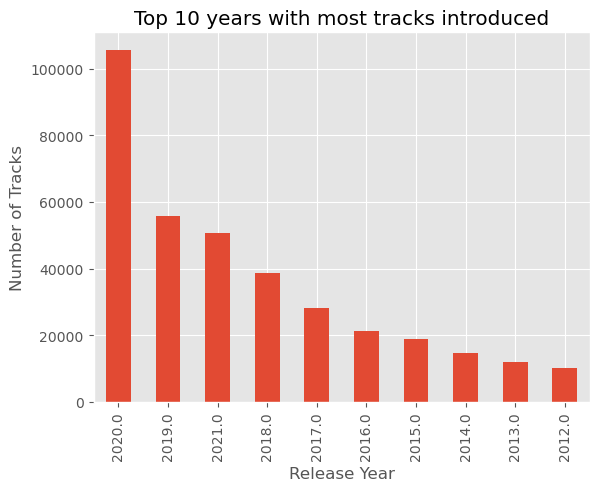

In [21]:
ax = df['Year'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 years with most tracks introduced')
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Tracks')

##### Now there's an obvious spike in year 2020., which can be connected to the start of the pandemic and lockdowns, pressuring people to be in their homes, which means more free time to work on music, which means more releases etc.

##### What I also want to take into an account is the tempo of the songs produced. More (faster) tempo means faster speed of the song, and less (slower) tempo is slower song. Let's find out what is the average tempo in BPM.

Text(0.5, 0, 'Tempo (BPM)')

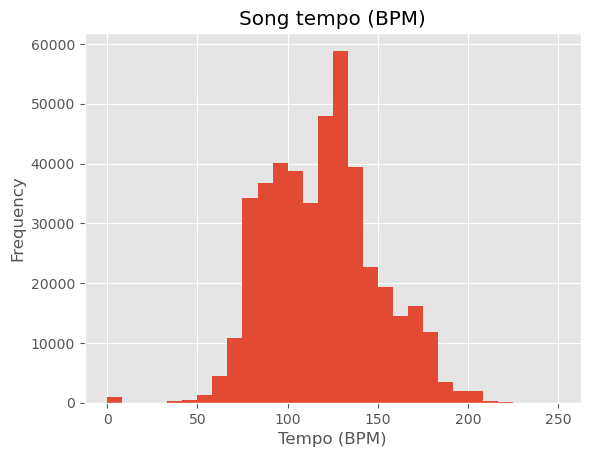

In [22]:
ax = df['tempo'].plot(kind='hist', bins=30, title='Song tempo (BPM)')
ax.set_xlabel('Tempo (BPM)')

Text(0.5, 0, 'Tempo (BPM)')

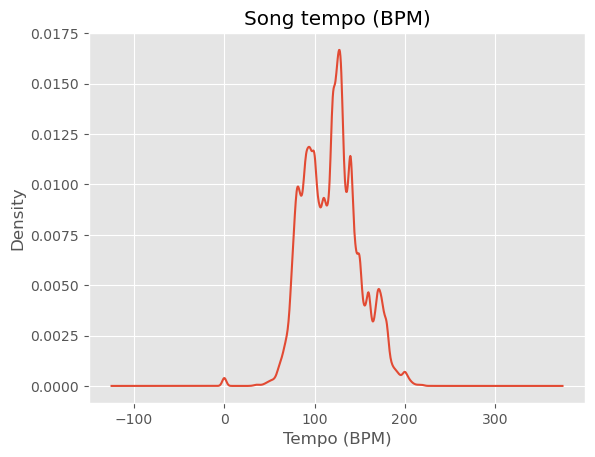

In [23]:
ax = df['tempo'].plot(kind='kde', title='Song tempo (BPM)')
ax.set_xlabel('Tempo (BPM)')

##### Most of the songs are in the range of the 100-150 BPM, standardized BPM values are 100-140 BPM, so there's not much surprise here.

# 4. Questions about the Data

1. What song is the number one song in this dataset according to Rating?

In [24]:
result = df.query('Rating == 100')

print(result)

             Track          Artist  Rating     Release    Year  Month  \
0  drivers license  Olivia Rodrigo     100  2021-01-08  2021.0    1.0   

   acousticness   key  loudness  mode    tempo  MarketShare  
0         0.721  10.0    -8.761   1.0  143.874          170  


##### According to rating, "drivers licence" from Olivia Rodrigo is rated #1 in 2021. Spotify streams.

2. Who is the most streamed artist in 2021?

In [25]:
artist_counts = df['Artist'].value_counts()
most_common_artist = artist_counts.index[0]
print(most_common_artist)


Bookstream Hörbücher


Bookstream Hörbücher is the most streamed artist in 2021, which is quite unusual since it is a series of audiobooks on Spotify on German language. 

##### 3. What are 25 most popular songs in 2021?

In [27]:
df.sort_values('Rating', ascending=False).head(25)


,Track,Artist,Rating,Release,Year,Month,acousticness,key,loudness,mode,tempo,MarketShare
0,drivers license,Olivia Rodrigo,100,2021-01-08,2021.0,1.0,0.72100,10.0,-8.761,1.0,143.874,170
2,Blinding Lights,The Weeknd,96,2020-03-20,2020.0,3.0,0.00146,1.0,-5.934,1.0,171.005,170
1,Save Your Tears,The Weeknd,96,2020-03-20,2020.0,3.0,0.02120,0.0,-5.487,1.0,118.051,170
3,Mood (feat. iann dior),24kGoldn,95,2020-07-24,2020.0,7.0,0.22100,7.0,-3.558,0.0,90.989,170
4,WITHOUT YOU,The Kid LAROI,94,2020-11-06,2020.0,11.0,0.21300,0.0,-7.357,1.0,93.005,170
5,Calling My Phone,Lil Tjay,94,2021-02-12,2021.0,2.0,0.45100,4.0,-7.636,0.0,104.949,170
6,Astronaut In The Ocean,Masked Wolf,94,2021-01-06,2021.0,1.0,0.17500,4.0,-6.865,0.0,149.996,169
7,The Business,Tiësto,94,2020-09-16,2020.0,9.0,0.41400,8.0,-7.079,0.0,120.031,170
8,Bandido,Myke Towers,94,2020-12-10,2020.0,12.0,0.12200,8.0,-4.637,1.0,168.021,169
12,positions,Ariana Grande,93,2020-10-30,2020.0,10.0,0.46800,0.0,-4.771,1.0,144.015,170


##### 4. Who is the most common artist in top 100 songs sorted by popularity?

In [41]:
def get_most_common_artist_by_rating(df):
    top_artists = df.head(100)  # Get the top 100 rows
    most_common_artist = top_artists.groupby('Artist')['Rating'].mean().sort_values(ascending=False).index[0]  # Get the most common artist by rating
    return most_common_artist

def get_most_frequent_artist_by_rating(df):
    top_artists = df.head(100)['Artist']  # Get the top 100 artists
    most_frequent_artist = top_artists[top_artists == get_most_common_artist_by_rating(df)].value_counts().index[0]  # Get the most frequent artist by rating
    return most_frequent_artist


In [42]:
most_frequent_artist = get_most_frequent_artist_by_rating(df)
print(most_frequent_artist)

Olivia Rodrigo
